In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [21]:
plot_root = '../plots/'
data_root = '../../hypoThesis/data/'
df = pd.read_csv(f'{data_root}cleaned.csv', header=[0,1])

In [ ]:
#Filter dataframe
lnls = ['I', 'II', 'III', 'IV', 'V', 'VI', 'VII']
cols_to_select = [('max_llh', lnl) for lnl in lnls] + [('info', 't_stage')]
df_selected = df.loc[:, cols_to_select].copy()
df_selected.columns = df_selected.columns.droplevel(0)
df_selected[lnls] = df_selected[lnls].astype(bool)

df_count = df_selected
df_cooc = df_selected[lnls].copy()

In [22]:
# Create an empty co-occurrence matrix

n_late = len(df_selected[df_selected['t_stage'] == 'late'])
n_early = len(df_selected[df_selected['t_stage'] == 'early'])

co_occurrence_matrix = pd.DataFrame(index=df_selected.columns[:-1], columns=df_selected.columns[:-1], dtype=float)
prevs_early = {}
prevs_late = {}
# Calculate the relative co-occurrence counts
for col in df_selected.columns[:-1]:
    # Get the subset of rows where the current column is True
    subset = df_selected[df_selected[col]]
    cooc = subset[lnls].copy()
    #count 'early' and 'late' t_stage patients
    counts = subset['t_stage'].value_counts()
    prevs_early[col] = counts['early']
    prevs_late[col] = counts['late']
    # Count how many of these rows also have True in each of the other columns
    co_occurrence_matrix[col] = subset[lnls].sum() / subset[lnls].shape[0]  # Normalize by the total count of True in `col`


df_normalized = co_occurrence_matrix.apply(lambda row: row / row[row.name], axis=1)


In [23]:
earlies = np.array([prevs_early[key] for key in prevs_early.keys()]) / n_early*100
lates = np.array([prevs_late[key] for key in prevs_late.keys()]) / n_late*100

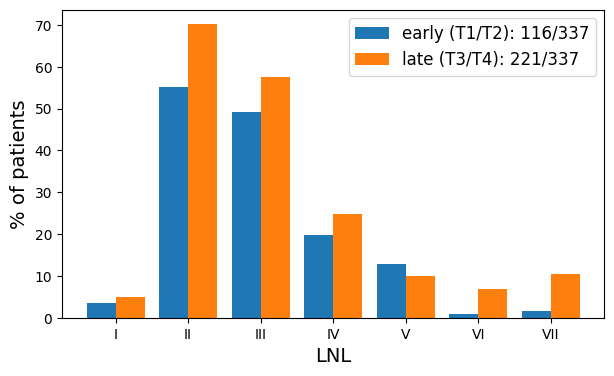

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Dictionaries
dict1 = np.array(prevs_early)
dict2 = prevs_late

# Bar plot settings
x = np.arange(len(prevs_early))  # X-axis positions
width = 0.4  # Width of bars


fig, ax = plt.subplots(figsize=(7,4))
ax.bar(x - width/2, earlies, width, label=f'early (T1/T2): {n_early}/{n_late+n_early}')
ax.bar(x + width/2, lates, width, label=f'late (T3/T4): {n_late}/{n_late+n_early}')

# Labels and title
ax.set_xlabel('LNL', fontsize=14)
ax.set_ylabel('% of patients', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(prevs_early.keys())  # Directly use dictionary keys
ax.legend(fontsize=12)
plt.tight_layout
plt.savefig(plot_root + 'prev_early_late.png', dpi=300)
plt.show()


<Figure size 640x480 with 0 Axes>

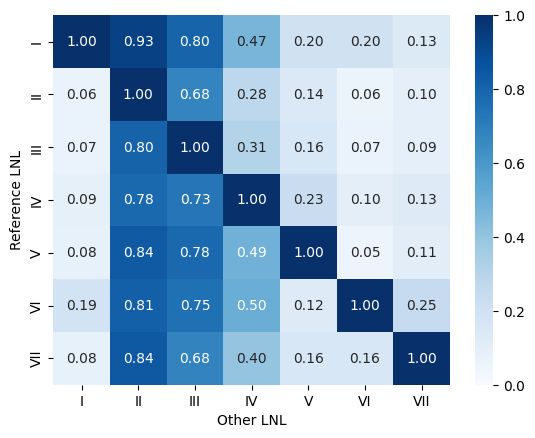

In [25]:
# Plot the co-occurrence matrix
plt.clf()
plt.figure()
sns.heatmap(df_normalized.T, annot=True, cmap='Blues', vmin=0, vmax=1, fmt=".2f")
#plt.title('Relative Co-occurrence of different LNLs')
plt.xlabel('Other LNL')
plt.ylabel('Reference LNL')
plt.savefig(plot_root+'cooccurrence_lnls.png')
plt.show();